In [13]:
!pip install shapely.geometry
!pip install geopandas

ERROR: Could not find a version that satisfies the requirement shapely.geometry (from versions: none)
ERROR: No matching distribution found for shapely.geometry


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# connect with google drive
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/cloud_computing/customer_behavior.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df

,customer_id,order_count,total_spent
0,1617b1357756262bfa56ab541c47bc16,8,13440.00
1,ec5b2ba62e574342386871631fafd3fc,4,7160.00
2,c6e2731c5b391845f6800c97401a43a9,1,6735.00
3,f48d464a0baaea338cb25f816991ab1f,1,6729.00
4,3fd6777bbce08a352fddd04e4a7cc8f6,1,6499.00
...,...,...,...
98661,d2c63ad286e3ca9dd69218008d61ff81,1,2.90
98662,184e8e8e48937145eb96c721ef1f0747,1,2.29
98663,a790343ca6f3fee08112d678b43aa7c5,1,2.20
98664,161b6d415e8b3413c6609c70cf405b5a,1,0.85


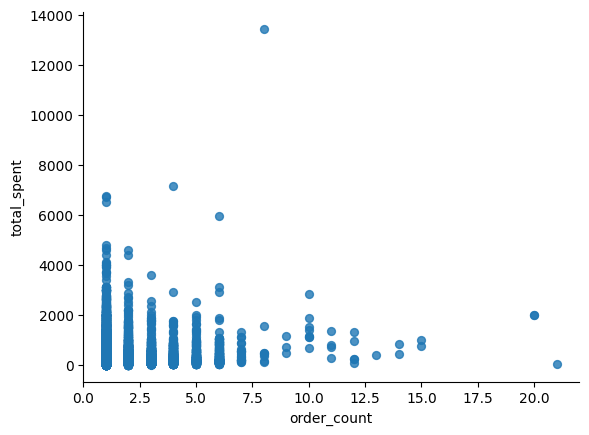

In [5]:
# @title order_count vs total_spent

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='order_count', y='total_spent', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Grouping by state and summing total spent
state_spend = df.groupby('customer_state')['total_spent'].sum().reset_index()

# Pivot for heatmap
state_pivot = state_spend.pivot("customer_state", "total_spent")

plt.figure(figsize=(12, 6))
sns.heatmap(state_pivot, annot=True, fmt=".1f")
plt.title('Total Spend by State')
plt.show()


In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/cloud_computing/query2.csv')
df.head()

,geolocation_lat,geolocation_lng
0,-23.541578,-46.641607
1,-23.546435,-46.633830
2,-23.540205,-46.644147
3,-23.539495,-46.632844
4,-23.547082,-46.633408


<ipython-input-20-14acd0188f3b>:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


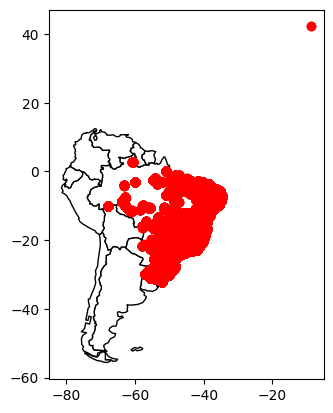

In [20]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

# Assuming df is your DataFrame with the geolocation data
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.geolocation_lng, df.geolocation_lat))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world.continent == 'South America'].plot(color='white', edgecolor='black')
gdf.plot(ax=ax, color='red')
plt.show()


In [4]:
# missing value
df.isnull().sum()
# delete the row of the missing value
df.dropna(inplace=True)

In [24]:
import folium

# Create a map centered around an average location
map_ = folium.Map([df['geolocation_lat'].mean(), df['geolocation_lng'].mean()], zoom_start=4)

# Adding markers to the map
for _, row in df.iterrows():
    folium.CircleMarker(location=[row['geolocation_lat'], row['geolocation_lng']],
                        radius=3,
                        color='red',
                        fill=True,
                        fill_color='red').add_to(map_)

map_


In [25]:
map_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


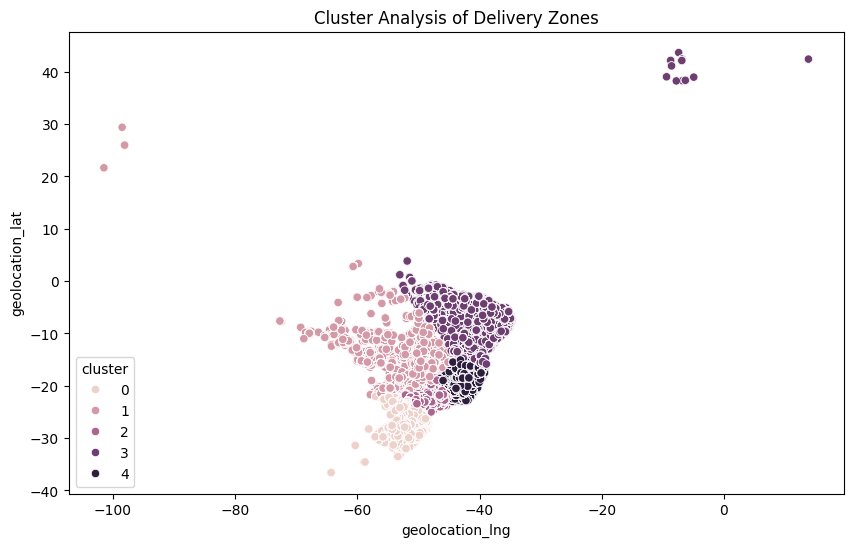

In [7]:
# optimal delivery zone

from sklearn.cluster import KMeans
import seaborn as sns

# Clustering
kmeans = KMeans(n_clusters=5)
df['cluster'] = kmeans.fit_predict(df[['geolocation_lat', 'geolocation_lng']])

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='geolocation_lng', y='geolocation_lat', hue='cluster', data=df)
plt.title('Cluster Analysis of Delivery Zones')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-8-8a6923e6f0d5>:13: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  brazil = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


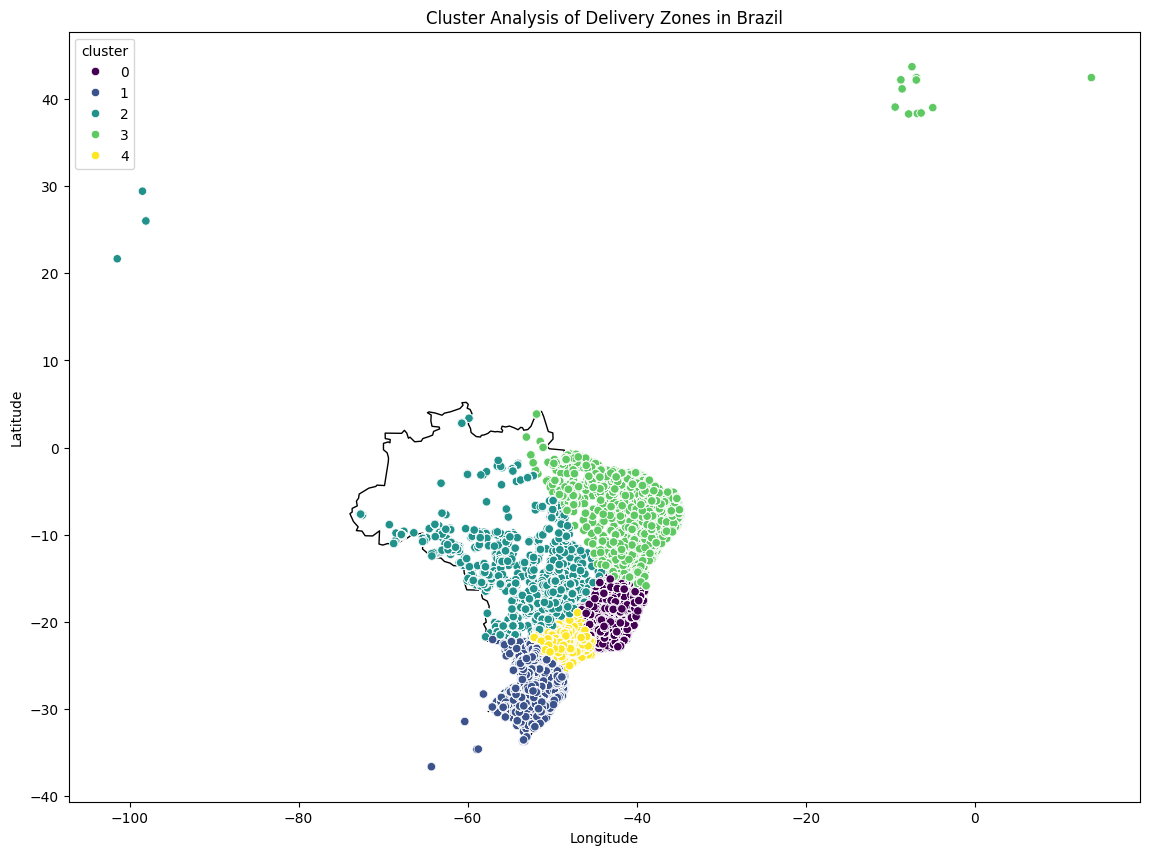

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Perform clustering
kmeans = KMeans(n_clusters=5)
df['cluster'] = kmeans.fit_predict(df[['geolocation_lat', 'geolocation_lng']])

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.geolocation_lng, df.geolocation_lat))

# Load map of Brazil
brazil = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
brazil = brazil[brazil.name == 'Brazil']

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
base = brazil.plot(ax=ax, color='white', edgecolor='black')
sns.scatterplot(ax=base, x=gdf.geometry.x, y=gdf.geometry.y, hue='cluster', palette='viridis', data=gdf)
plt.title('Cluster Analysis of Delivery Zones in Brazil')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
